In [1]:
import pickle as pkl
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
%matplotlib inline
from sklearn.decomposition import PCA
import pandas as pd
from scipy.spatial.distance import cdist
import sklearn

nrc_dim = 8
genres = ['Metal', 'electronicmusic', 'classicalmusic', 'kpop', 'hiphopheads', 'EDM',
          'folk', 'Rock', 'blues', 'punk','rap', 'rnb', 'Jazz', 'animemusic', 'country',\
          'dubstep', 'indieheads', 'jpop', 'japanesemusic', 'postrock', 'trap']
target_com = ['blues', 'country', 'electronicmusic',  'folk', 'Jazz', 'rnb', 'Rock', 'Metal', 'punk', 'rap']
emotions = ['anger', 'anticipation', 'disgust', 'fear', 'joy', 'sadness',\
            'surprise', 'trust', 'positive', 'negative']


In [7]:
data_ = None
with open('subreddits_emotion_counts.pkl', 'rb') as inf:
    data_ = pkl.load(inf)
data = []
for tar_gen in target_com:
    data.append([data_[tar_gen][i] for i in emotions])

In [9]:
for i in range(len(data)):
    data[i] = data[i]/np.sum(data[i][:nrc_dim])
    
    
# for i in range(len(data)):
#     print(target_com[i],data[i][0])
    
    
X = np.concatenate([data[0][:nrc_dim], data[1][:nrc_dim]])
for i in range(2, len(data)):
    X = np.concatenate([X, data[i][:nrc_dim]])
X = X.reshape(-1, nrc_dim)

1 : 0.03989942284220627
2 : 0.019336543133416116
3 : 0.016143162943288623
4 : 0.013240553236869457
5 : 0.009868798746856124
6 : 0.007271423208107611
7 : 0.0053582996281013595
8 : 0.003460025901306786


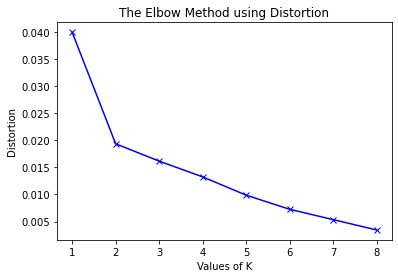

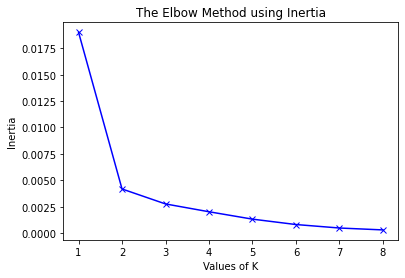

<Figure size 432x288 with 0 Axes>

In [10]:
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 9)
 
for k in K:
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
 
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_,
                                        'euclidean'), axis=1)) / X.shape[0])
    inertias.append(kmeanModel.inertia_)
 
    mapping1[k] = sum(np.min(cdist(X, kmeanModel.cluster_centers_,
                                   'euclidean'), axis=1)) / X.shape[0]
    mapping2[k] = kmeanModel.inertia_


for key, val in mapping1.items():
    print(f'{key} : {val}')
   
plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()
plt.savefig('dist_elbow')


plt.plot(K, inertias, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.show()
plt.savefig('iner_elbow')

In [12]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)
print([(target_com[i], y_kmeans[i]) for i in range(len(target_com))])
# print(y_kmeans)

[('blues', 0), ('country', 0), ('electronicmusic', 0), ('folk', 0), ('Jazz', 0), ('rnb', 0), ('Rock', 0), ('Metal', 1), ('punk', 1), ('rap', 1)]


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


   Principal Component 1  Principal Component 2      label
0              -0.022721               0.005436  Cluster 1
1              -0.012385              -0.019799  Cluster 1
2              -0.017326               0.012723  Cluster 1
3              -0.043540              -0.013788  Cluster 1
4              -0.024910              -0.006767  Cluster 1
5              -0.047536               0.022354  Cluster 1
6              -0.007933              -0.007659  Cluster 1
7               0.046494               0.006976  Cluster 2
8               0.068338              -0.003643  Cluster 2
9               0.061520               0.004167  Cluster 2


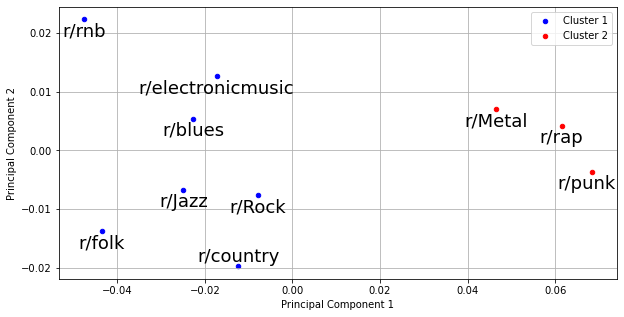

In [13]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['Principal Component 1', 'Principal Component 2'])
principalDf['label'] = ['Cluster '+ str(i+1) for i in y_kmeans]
print(principalDf)
cdict = {'Cluster 1': 'blue', 'Cluster 2': 'red'}
fig = plt.figure(figsize = (10,5))
xs = principalDf['Principal Component 1']
ys = principalDf['Principal Component 2']
ax = fig.add_subplot(1,1,1) 


grouped = principalDf.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='Principal Component 1', y='Principal Component 2', label=key, color=cdict[key])

anot_map = {'country': (0,5), 'punk': (-5, -17)}
for i in range(len(xs)):
#     ax.scatter(xs[i], ys[i], c=cdict[y_kmeans[i]], label=y_kmeans[i])
    label = target_com[i]
    pos_ = anot_map.get(target_com[i], (0, -17))
    plt.annotate('r/'+label, #the text
                 (xs[i], ys[i]), #point to label
                 textcoords="offset points", # how to position
                 xytext=pos_, # dist text to point
                 ha='center', fontsize=18)
ax.legend()
ax.grid()
fig.savefig('k-means_comments.eps')

In [14]:
X=X*1
#visualizing decision tree
dt_df = pd.DataFrame()
for i in range(nrc_dim):
    dt_df[emotions[i]] = X[:, i]
dt_df['label'] = y_kmeans
dt_df['genre'] = target_com
dt_df


,anger,anticipation,disgust,fear,joy,sadness,surprise,trust,label,genre
0,0.067835,0.182892,0.054867,0.070616,0.210800,0.107117,0.089888,0.215984,0,blues
1,0.074848,0.161441,0.058200,0.070429,0.216420,0.130895,0.086729,0.201038,0,country
2,0.074931,0.190836,0.058079,0.069065,0.212174,0.114146,0.084625,0.196145,0,electronicmusic
3,0.061243,0.173312,0.044812,0.066873,0.238160,0.119878,0.087277,0.208444,0,folk
4,0.066339,0.179177,0.046809,0.071466,0.209964,0.117800,0.085876,0.222569,0,Jazz
5,0.063741,0.199421,0.047387,0.058366,0.230834,0.100377,0.098700,0.201174,0,rnb
6,0.076047,0.171489,0.055931,0.077087,0.207055,0.121564,0.085551,0.205276,0,Rock
7,0.099329,0.167384,0.080291,0.097479,0.170777,0.115064,0.080325,0.189351,1,Metal
8,0.115195,0.150746,0.083690,0.104175,0.159430,0.113746,0.075829,0.197190,1,punk
9,0.112497,0.159926,0.087815,0.094955,0.164843,0.117597,0.076694,0.185674,1,rap


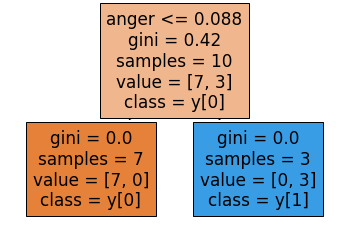

In [17]:
import sklearn.tree as tree_
import string
import random
clf = tree_.DecisionTreeClassifier()
clf.fit(X, [i+1 for i in y_kmeans])
sklearn.tree.plot_tree(clf,
                       feature_names = dt_df.columns[:8],
                       filled = True,
                       class_names=True);
# plt.savefig('decision_tree_example.eps',format='eps',bbox_inches = "tight")